## Decision Tree Baseline Model

In [263]:
import pandas as pd

crashes_cleaned = pd.read_csv('../data/crashes_cleaned.csv', index_col = 0)
crashes_cleaned.head()

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,...,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,30,1,0,0,1,2,BAD DRIVING,4,14,...,1,0,0,0,0,0,0,1,0,0
46,c107aea0fb8320ca5e7676759af9399cffe67f3ac8e429...,30,1,0,0,1,2,BAD DRIVING,2,17,...,1,0,0,0,0,0,0,1,0,0
56,db61137bc4bb19b84665da12c4c367592e874c623f76a1...,30,0,0,0,0,2,BAD DRIVING,3,18,...,1,0,0,0,0,0,0,1,0,0
63,8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...,30,1,0,0,1,2,BAD DRIVING,2,11,...,1,0,0,0,0,0,0,1,0,0
74,f1779af8b006d956f29723ac415bd54b61ef9acf84e38e...,30,1,1,0,1,2,BREAKING LAW,2,15,...,0,0,0,0,1,0,0,1,0,0


### Primary Contributory Causes 

In [264]:
crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)

BAD DRIVING                   0.622616
BREAKING LAW                  0.257843
OUTSIDE FACTORS               0.063773
DRINKING/DRUGS                0.033166
DISTRACTION INSIDE VEHICLE    0.016300
OTHER                         0.006302
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

### Label Encoding Target Variable

In [265]:
# label encoding target variable
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'] = label.fit_transform(crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE'])
crashes_cleaned

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,...,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,30,1,0,0,1,2,0,4,14,...,1,0,0,0,0,0,0,1,0,0
46,c107aea0fb8320ca5e7676759af9399cffe67f3ac8e429...,30,1,0,0,1,2,0,2,17,...,1,0,0,0,0,0,0,1,0,0
56,db61137bc4bb19b84665da12c4c367592e874c623f76a1...,30,0,0,0,0,2,0,3,18,...,1,0,0,0,0,0,0,1,0,0
63,8640aa03a86f10df7a8c1dafc03d1551c4a4c0262397f3...,30,1,0,0,1,2,0,2,11,...,1,0,0,0,0,0,0,1,0,0
74,f1779af8b006d956f29723ac415bd54b61ef9acf84e38e...,30,1,1,0,1,2,1,2,15,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798899,ffffc0eaf9bc22a04bf318b62e0e1c5ec59a4f3c0c3493...,30,1,0,0,1,0,0,2,12,...,1,0,0,0,0,0,0,1,0,0
798901,ffffc802346fd6f48f99117898fbc558237a3052c327b8...,30,0,0,0,0,2,3,2,7,...,1,0,0,0,0,0,0,0,0,1
798902,ffffd143cf6dc784876069140869d2d724080089450108...,30,1,0,0,1,2,0,2,19,...,0,0,0,0,1,0,0,1,0,0
798904,ffffe577251dc1cc67f2f823b595e5028427a210e2a40e...,30,1,0,0,1,1,1,2,8,...,1,0,0,0,0,0,0,1,0,0


### Perform Train Test Split 

In [219]:
# create X and y and train test split
from sklearn.model_selection import train_test_split

X = crashes_cleaned.drop(columns = ['PRIM_CONTRIBUTORY_CAUSE', 'CRASH_RECORD_ID'])
y = crashes_cleaned['PRIM_CONTRIBUTORY_CAUSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [221]:
X_train[0:5].shape

(5, 125)

### Distribution of Target Variable Across Classes

In [266]:
y_train.value_counts(normalize = True)

0    0.622578
1    0.257867
5    0.064101
3    0.032961
2    0.016234
4    0.006258
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

In [267]:
# # import tree and instantiate and fit baseline model
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier()

# clf.fit(X_train, y_train)

### Perform Cross Validation on Train Set

In [268]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

def cross_validation(X_train, y_train, num_split=10):
    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits=num_split).split(X_train):
        # Train and validation splitting
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        # Create/fit decision tree classifier
        clf = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state =10)
        clf.fit(X_train_fold, y_train_fold)

        # Evaluate performance
        accuracy_train = clf.score(X_train_fold, y_train_fold)
        accuracy_val = clf.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

result = cross_validation(X_train, y_train, num_split=10)
print(result)

{'train': 0.7460863874141145, 'validation': 0.7360971620234202}


### Plot Decision Tree

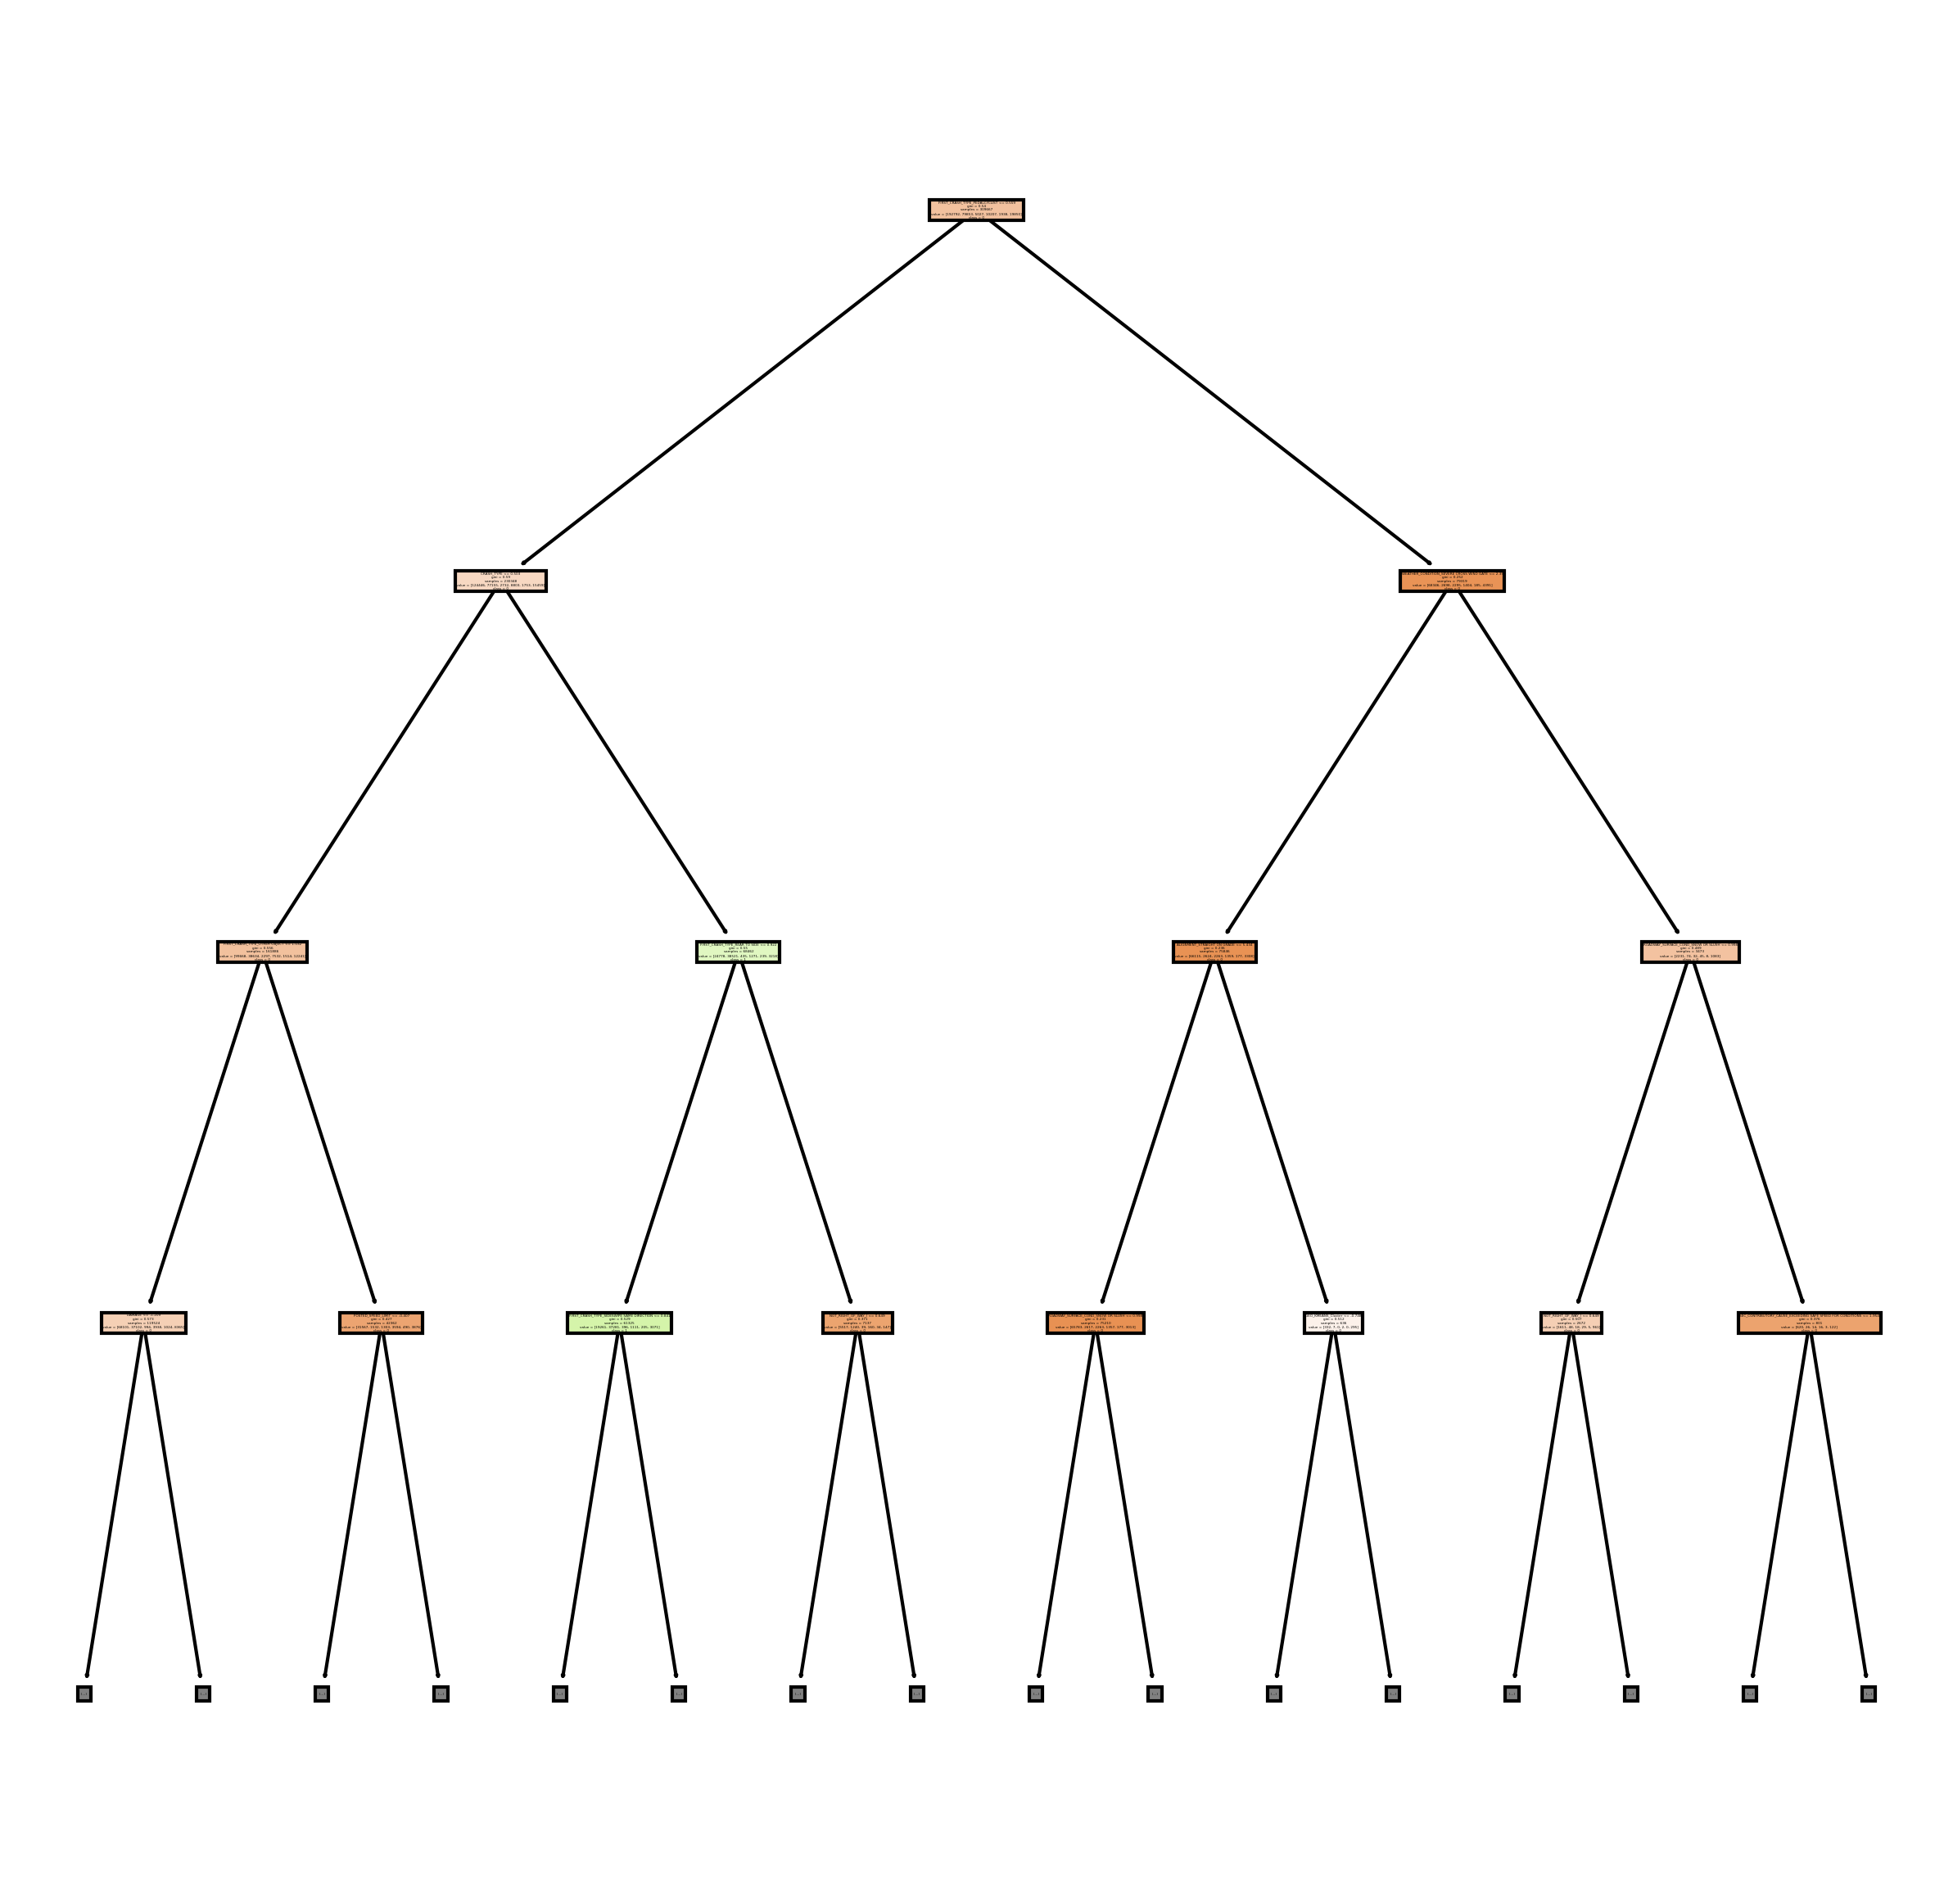

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=300)
plot_tree(clf,
           max_depth = 3,
           feature_names = crashes_cleaned.columns, 
           class_names=np.unique(y).astype('str'),
           filled = True,
           ax = axes)
plt.show()

### Baseline Model Accuracy Score

In [270]:
from sklearn.metrics import accuracy_score

y_preds = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

y_pred_proba = clf.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
# auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
# print('AUC Score:', auc_score)

Accuracy: 0.28219116151150964


### Criterion='Entropy'

In [271]:
# build a model and change purity metric to entropy 

clf_entropy = DecisionTreeClassifier(criterion='entropy')

clf_entropy.fit(X_train, y_train)

y_preds_entropy = clf_entropy.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_preds_entropy))

Accuracy: 0.6245865199864371


### Scaler

In [272]:
from sklearn.preprocessing import StandardScaler
# scale the data lets see if it improves the score
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# try out both models on scaled data
clf.fit(X_train_sc, y_train)
y_preds_sc_gini = clf.predict(X_test_sc)
print('Accuracy gini scaled:', accuracy_score(y_test, y_preds_sc_gini))

clf_entropy.fit(X_train_sc, y_train)
y_preds_sc_entropy = clf_entropy.predict(X_test_sc)
print('Accuracy entropy scaled:', accuracy_score(y_test, y_preds_sc_entropy))

Accuracy gini scaled: 0.6257996458576649
Accuracy entropy scaled: 0.6262592773989376


Scaling the data made miniscule difference i will not be using the scaled data.

### Balance Weights

In [273]:
# balance the class weights
clf_w = DecisionTreeClassifier(class_weight='balanced')
clf_w.fit(X_train, y_train)
y_preds_w = clf_w.predict(X_test)
print('Accuracy weighted:', accuracy_score(y_test, y_preds_w))

Accuracy weighted: 0.6218061259089025


In [274]:
y_pred_proba = clf.predict_proba(X_test)

from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Score:', auc_score)

AUC Score: 0.5048639322647681


### Oversampling: SMOTE

In [275]:
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    275434
1    114065
5     28212
3     14672
2      7211
4      2788
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

5    192792
4    192792
3    192792
2    192792
1    192792
0    192792
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64


In [276]:
# model with resampled training data using SMOTE
clf_resamp = DecisionTreeClassifier()

clf_resamp.fit(X_train_resampled, y_train_resampled)

y_preds_resamp = clf_resamp.predict(X_test)
print('Accuracy weighted:', accuracy_score(y_test, y_preds_resamp))

y_pred_proba_resamp = clf_resamp.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba_resamp,  multi_class='ovo')
print('AUC Score:', auc_score)

Accuracy weighted: 0.6004897713144709
AUC Score: 0.5958807609628882


## Tuning Hyperparameters

### Max_depth

In [277]:
# ok this is bad lets do something else 
# find best depth
depth_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

for depth in depth_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = depth, min_samples_split = 10)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy depth', depth,':', accuracy_score(y_test, y_preds))
    
    y_pred_proba = clf.predict_proba(X_test)
    auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
    print('AUC Score', depth, ':', auc_score)

Accuracy depth 3 : 0.6795388614700675
AUC Score 3 : 0.5048639322647681
Accuracy depth 5 : 0.6951135892702407
AUC Score 5 : 0.5048639322647681
Accuracy depth 7 : 0.7104471988848284
AUC Score 7 : 0.5048639322647681
Accuracy depth 9 : 0.7260520664581999
AUC Score 9 : 0.5048639322647681
Accuracy depth 11 : 0.7333835662886636
AUC Score 11 : 0.5048639322647681
Accuracy depth 13 : 0.7344912029536977
AUC Score 13 : 0.5048639322647681
Accuracy depth 15 : 0.7331349131597785
AUC Score 15 : 0.5048639322647681
Accuracy depth 17 : 0.7310703386957013
AUC Score 17 : 0.5048639322647681
Accuracy depth 19 : 0.7268130957314546
AUC Score 19 : 0.5048639322647681
Accuracy depth 21 : 0.7230456240816788
AUC Score 21 : 0.5048639322647681


### min_samples_split

In [278]:
# find best min samples split
minsamp_list = [15, 17, 19, 21, 23, 25, 27, 35]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_split = minsamp)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Score', minsamp, ':', auc_score)

Accuracy  15 : 0.7334438458350601
Accuracy  17 : 0.7337377086237427
Accuracy  19 : 0.7337753833402404
Accuracy  21 : 0.7337527785103417
Accuracy  23 : 0.7339411520928305
Accuracy  25 : 0.7339637569227292
Accuracy  27 : 0.7339863617526278
Accuracy  35 : 0.7343103643145086
AUC Score 35 : 0.5048639322647681


In [279]:
# iteration for best minimum samples split
minsamp_list = [37, 39, 41, 43, 45, 50]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_split = minsamp)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')
print('AUC Test Score:', auc_score)

Accuracy  37 : 0.7343631089176054
Accuracy  39 : 0.7345288776701955
Accuracy  41 : 0.7344912029536977
Accuracy  43 : 0.7345665523866933
Accuracy  45 : 0.7347473910258825
Accuracy  50 : 0.7348830200052745
AUC Test Score: 0.5048639322647681


### min_samples_leaf

In [280]:
# iteration for best minimum samples leaf 
minsamp_list = [37, 39, 41, 43, 45, 50, 100]

for minsamp in minsamp_list:
    
    clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = minsamp, min_samples_split = 50)
    clf_hyper.fit(X_train, y_train)
    y_preds = clf_hyper.predict(X_test)
    print('Accuracy ', minsamp,':', accuracy_score(y_test, y_preds))
    
y_pred_proba = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba,  multi_class='ovo')

Accuracy  37 : 0.7366612666239687
Accuracy  39 : 0.7369551294126512
Accuracy  41 : 0.7370982933353426
Accuracy  43 : 0.7373017368044306
Accuracy  45 : 0.7370907583920431
Accuracy  50 : 0.73663866179407
Accuracy  100 : 0.7367140112270655


### Combination of Best Hyperparameters

In [281]:
# best model 
clf_hyper = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50)
clf_hyper.fit(X_train, y_train)
y_preds = clf_hyper.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_preds))

Accuracy: 0.7369551294126512


### Final Model Scores:

In [282]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

print('Accuracy:', accuracy_score(y_test, y_preds))
print('Precision:', precision_score(y_test, y_preds, average=None))
print('Recall:', recall_score(y_test, y_preds, average=None))
print('f1 score:', f1_score(y_test, y_preds, average=None))

Accuracy: 0.7369551294126512
Precision: [0.7618553  0.6784968  0.47619048 0.49911817 0.87755102 0.62460667]
Recall: [0.88744222 0.64541681 0.01373626 0.06338186 0.10117647 0.2373834 ]
f1 score: [0.81986731 0.66154353 0.02670227 0.11248013 0.1814346  0.3440208 ]


In [283]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.02      0.03     82642
           1       0.25      0.04      0.06     34212
           2       0.02      0.89      0.03      2184
           3       0.03      0.01      0.01      4465
           4       0.01      0.07      0.01       850
           5       0.00      0.00      0.00      8362

    accuracy                           0.04    132715
   macro avg       0.15      0.17      0.03    132715
weighted avg       0.44      0.04      0.04    132715



/Users/nechamaborisute/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [284]:
print('Accuracy:', accuracy_score(y_test, y_preds))
print('Precision:', precision_score(y_test, y_preds, average='weighted'))
print('Recall:', recall_score(y_test, y_preds, average='weighted'))
print('f1 score:', f1_score(y_test, y_preds, average='weighted'))

Accuracy: 0.7369551294126512
Precision: 0.7189196393878695
Recall: 0.7369551294126512
f1 score: 0.7081314395173322


### Resampled and Final Model Hyperparameters Scores:

In [285]:
clf_resamp = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50)

clf_resamp.fit(X_train_resampled, y_train_resampled)

y_preds_resamp = clf_resamp.predict(X_test)

print('Accuracy weighted:', accuracy_score(y_test, y_preds_resamp))
print('Precision:', precision_score(y_test, y_preds_resamp, average='weighted'))
print('Recall:', recall_score(y_test, y_preds_resamp, average='weighted'))
print('f1 score:', f1_score(y_test, y_preds_resamp, average='weighted'))

Accuracy weighted: 0.6294917680744453
Precision: 0.6870530498532503
Recall: 0.6294917680744453
f1 score: 0.6550525891287002


In [286]:
print(classification_report(y_test, y_preds_resamp))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     82642
           1       0.62      0.61      0.61     34212
           2       0.05      0.16      0.08      2184
           3       0.16      0.24      0.19      4465
           4       0.03      0.23      0.06       850
           5       0.39      0.29      0.33      8362

    accuracy                           0.63    132715
   macro avg       0.34      0.37      0.34    132715
weighted avg       0.69      0.63      0.66    132715



### Bagging Classifier

In [288]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
bagging.score(X_test,y_test)

y_pred = bagging.predict(X_test)

print('Accuracy weighted:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Accuracy weighted: 0.6820856723053159
Precision: [0.69667093 0.6218869  0.28070175 0.39095745 0.86734694 0.61912823]
Recall: [0.91059026 0.39632293 0.00732601 0.03292273 0.1        0.17495814]
f1 score: [0.78939473 0.48412032 0.01427934 0.06073125 0.17932489 0.27282051]


In [299]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state= 15),
                            n_estimators=20, max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
bagging.score(X_test,y_test)

y_pred = bagging.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

Accuracy: 0.7026937422295897
Precision: [0.70260667 0.69463476 0.         0.         0.88349515 0.82632399]
Precision weighted: 0.674304762831465
Recall: [0.9403088  0.42081726 0.         0.         0.10705882 0.12688352]
Recall weighted: 0.7026937422295897
f1 score: [0.80426199 0.5241181  0.         0.         0.19097587 0.21998756]
f1 score weighted: 0.6510101591929539


In [300]:
bag_list = [20, 30, 40, 50]

for bag in bag_list:
    bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 39, min_samples_split = 50, random_state= 15),
                            n_estimators=bag, max_samples=0.5, max_features=0.5)
    bagging.fit(X_train, y_train)
    bagging.score(X_test,y_test)

    y_pred = bagging.predict(X_test)

    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

Accuracy: 0.7076140602041969
Precision: [0.70640419 0.70649965 0.         0.         0.95833333 0.81245474]
Precision weighted: 0.6793335414091984
Recall: [0.94137364 0.43686426 0.         0.         0.05411765 0.13417843]
Recall weighted: 0.7076140602041969
f1 score: [0.80713585 0.53988838 0.         0.         0.10244989 0.2303192 ]
f1 score weighted: 0.6569490572671093
Accuracy: 0.698639942734431
Precision: [0.69814534 0.69247224 0.         1.         0.91891892 0.80856945]
Precision weighted: 0.7037209555421237
Recall: [9.42414269e-01 3.97404420e-01 0.00000000e+00 6.71892497e-04
 8.00000000e-02 1.39918680e-01]
Recall weighted: 0.698639942734431
f1 score: [0.80209476 0.50499573 0.         0.00134288 0.14718615 0.23855643]
f1 score weighted: 0.6456658398852657
Accuracy: 0.7061974908638813
Precision: [0.70484968 0.70563613 0.         0.72727273 0.89411765 0.80185553]
Precision weighted: 0.7015318489939539
Recall: [0.94299509 0.42376944 0.         0.00179171 0.08941176 0.14470222]
Reca

In [289]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, max_samples=0.5, max_features=0.5)
bagging.fit(X_train_resampled, y_train_resampled)
bagging.score(X_test,y_test)

y_pred = bagging.predict(X_test)

print('Accuracy weighted:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('f1 score:', f1_score(y_test, y_pred, average=None))

Accuracy weighted: 0.6383980710545153
Precision: [0.76249634 0.54740374 0.06939338 0.18707483 0.14570552 0.34124773]
Recall: [0.72412333 0.61042909 0.06913919 0.20940649 0.11176471 0.33688113]
f1 score: [0.74281458 0.57720106 0.06926606 0.19761175 0.126498   0.33905037]


### Random Forests

In [301]:
from sklearn.ensemble import RandomForestClassifier
forest_list = [20, 30, 40, 50]

for forest_not_tree in forest_list:

    clf = RandomForestClassifier(n_estimators=forest_not_tree, max_depth=None,  min_samples_split=2, random_state=0)
    clf.fit(X_train, y_train)
    clf.score(X_test,y_test)
    y_pred = clf.predict(X_test)
    
    print('-----------------------------------------')
    print('n_estimators', forest_not_tree)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

-----------------------------------------
n_estimators 20
Accuracy: 0.7335342651546547
Precision: [0.75521559 0.68046617 0.33333333 0.49183303 0.8203125  0.64084279]
Precision weighted: 0.7133531487582512
Recall: [0.89183466 0.62121478 0.01923077 0.06069429 0.12352941 0.23642669]
Recall weighted: 0.7335342651546547
f1 score: [0.81785901 0.64949194 0.03636364 0.10805423 0.21472393 0.34541801]
f1 score weighted: 0.7040854707233731
-----------------------------------------
n_estimators 30
Accuracy: 0.7365331725878763
Precision: [0.75788716 0.6831561  0.37254902 0.52559055 0.8559322  0.65173645]
Precision weighted: 0.7184057479943771
Recall: [0.89240338 0.63091898 0.01739927 0.05979843 0.11882353 0.24013394]
Recall weighted: 0.7365331725878763
f1 score: [0.81966302 0.65599927 0.03324584 0.10737985 0.20867769 0.35095692]
f1 score weighted: 0.7071226024164001
-----------------------------------------
n_estimators 40
Accuracy: 0.7388690050107373
Precision: [0.75983458 0.68508913 0.40816327 0.

In [302]:
forest_list = [60,70,80]

for forest_not_tree in forest_list:

    clf = RandomForestClassifier(n_estimators=forest_not_tree, max_depth=None,  min_samples_split=2, random_state=0)
    clf.fit(X_train, y_train)
    clf.score(X_test,y_test)
    y_pred = clf.predict(X_test)
    
    print('-----------------------------------------')
    print('n_estimators', forest_not_tree)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

-----------------------------------------
n_estimators 60
Accuracy: 0.7397053837169876
Precision: [0.7605135  0.68553341 0.42528736 0.59330144 0.85470085 0.66830709]
Precision weighted: 0.7248361063060056
Recall: [0.89390383 0.6393663  0.01694139 0.05554311 0.11764706 0.24360201]
Recall weighted: 0.7397053837169876
f1 score: [0.82183125 0.66164549 0.03258476 0.1015769  0.20682523 0.35705521]
f1 score weighted: 0.7100945392026309
-----------------------------------------
n_estimators 70
Accuracy: 0.7410390686810082
Precision: [0.76136913 0.68780365 0.4556962  0.59330144 0.85964912 0.67293729]
Precision weighted: 0.7267779929097239
Recall: [0.89522277 0.64138314 0.01648352 0.05554311 0.11529412 0.24384119]
Recall weighted: 0.7410390686810082
f1 score: [0.82288822 0.6637828  0.03181617 0.1015769  0.2033195  0.35797051]
f1 score weighted: 0.711326256071441
-----------------------------------------
n_estimators 80
Accuracy: 0.7410692084542064
Precision: [0.76115963 0.68868398 0.44871795 0.5

In [303]:
forest_list = [90, 100, 110, 120]

for forest_not_tree in forest_list:

    clf = RandomForestClassifier(n_estimators=forest_not_tree, max_depth=None,  min_samples_split=2, random_state=0)
    clf.fit(X_train, y_train)
    clf.score(X_test,y_test)
    y_pred = clf.predict(X_test)
    
    print('-----------------------------------------')
    print('n_estimators', forest_not_tree)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
    print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
    print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
    print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
    print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

-----------------------------------------
n_estimators 90
Accuracy: 0.7417398184078665
Precision: [0.76171071 0.689599   0.44578313 0.58711217 0.86607143 0.67487521]
Precision weighted: 0.7272453818223323
Recall: [0.89567048 0.64339998 0.01694139 0.05509518 0.11411765 0.24252571]
Recall weighted: 0.7417398184078665
f1 score: [0.82327687 0.66569891 0.03264226 0.1007371  0.2016632  0.35682238]
f1 score weighted: 0.7119646027554243
-----------------------------------------
n_estimators 100
Accuracy: 0.7416644689748709
Precision: [0.76162557 0.6892409  0.44871795 0.60635697 0.87387387 0.67340849]
Precision weighted: 0.7277533735138986
Recall: [0.89598509 0.64226003 0.01602564 0.05554311 0.11411765 0.24288448]
Recall weighted: 0.7416644689748709
f1 score: [0.82336    0.66492162 0.03094607 0.10176446 0.20187305 0.35700475]
f1 score weighted: 0.7118354835521986
-----------------------------------------
n_estimators 110
Accuracy: 0.7417850280676638
Precision: [0.76181949 0.68895012 0.43243243 

### Best number of estimators model

In [308]:
clf = RandomForestClassifier(n_estimators=120, max_depth=None,  min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)

print('-----------------------------------------')
print('n_estimators')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None,zero_division=0))
print('Precision weighted:', precision_score(y_test, y_pred, average='weighted',zero_division=0))
print('Recall:', recall_score(y_test, y_pred, average=None, zero_division=0))
print('Recall weighted:', recall_score(y_test, y_pred, average='weighted', zero_division=0))
print('f1 score:', f1_score(y_test, y_pred, average=None,zero_division=0))
print('f1 score weighted:', f1_score(y_test, y_pred, average='weighted', zero_division=0))

-----------------------------------------
n_estimators
Accuracy: 0.7419357269336548
Precision: [0.76193172 0.68865799 0.47761194 0.61298077 0.85087719 0.6816218 ]
Precision weighted: 0.7288622904805947
Recall: [0.89575519 0.64316614 0.01465201 0.05711086 0.11411765 0.24527625]
Recall weighted: 0.7419357269336548
f1 score: [0.82344173 0.66513512 0.02843181 0.10448679 0.20124481 0.36074224]
f1 score weighted: 0.7122230913857046


### Confusion Matrix

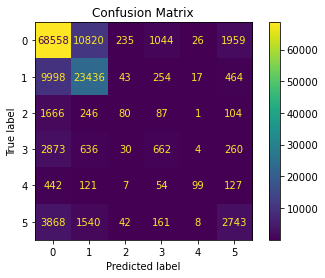

In [312]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

### Roc Curve and AUC

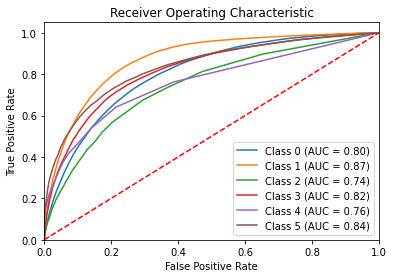

In [315]:
# roc curve and auc score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

y_scores = clf.predict_proba(X_test)
n_classes = len(clf.classes_)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=clf.classes_)

# Calculate the false positive rate, true positive rate, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

interpret the model.